# Importing Libraries

In [30]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

# Importing Data

In [31]:
# Creating Path
path = r'C:\Users\jenni\OneDrive\Documenten\Data Analyst Program\Data Analytics Immersion\Achievement 6\Gun violence data\02 Data'

In [32]:
# Importing Data
df_gun = pd.read_csv(os.path.join(path, 'Prepared Data', 'gun_violence_clean.csv'))

# Task

## Data Cleaning

In [33]:
df_gun.head()

,Unnamed: 0,incident_id,date,state,city_or_county,address,n_killed,n_injured,congressional_district,incident_characteristics,latitude,longitude,participant_age_group,participant_gender,participant_status,participant_type,state_house_district,state_senate_district
0,0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,14.0,Shot - Wounded/Injured||Mass Shooting (4+ vict...,40.3467,-79.8559,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,NaN,NaN
1,1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,43.0,"Shot - Wounded/Injured||Shot - Dead (murder, a...",33.9090,-118.3330,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,62.0,35.0
2,2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,9.0,"Shot - Wounded/Injured||Shot - Dead (murder, a...",41.4455,-82.1377,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,56.0,13.0
3,3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,6.0,"Shot - Dead (murder, accidental, suicide)||Off...",39.6518,-104.8020,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,40.0,28.0
4,4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,6.0,"Shot - Wounded/Injured||Shot - Dead (murder, a...",36.1140,-79.9569,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,62.0,27.0


In [34]:
# Creating Dataframe with only numerical variables
df_num = df_gun[['n_killed', 'n_injured', 'latitude', 'longitude', 'congressional_district']]

In [35]:
df_num.head()

,n_killed,n_injured,latitude,longitude,congressional_district
0,0,4,40.3467,-79.8559,14.0
1,1,3,33.9090,-118.3330,43.0
2,1,3,41.4455,-82.1377,9.0
3,4,0,39.6518,-104.8020,6.0
4,2,2,36.1140,-79.9569,6.0


In [36]:
df_num.isnull().sum()

n_killed                      0
n_injured                     0
latitude                   7923
longitude                  7923
congressional_district    11944
dtype: int64

In [37]:
df_num.shape

(239677, 5)

In [38]:
# Deleting missing values
df_num = df_num.dropna()

In [39]:
df_num.shape

(227723, 5)

## Elbow Technique

In [40]:
# Defining k-means Cluster Range
num_cl = range(1, 10)
kmeans = [KMeans(n_clusters = i) for i in num_cl]

In [41]:
# Creating rate of variation score
score = [kmeans[i].fit(df_num).score(df_num) for i in range(len(kmeans))]

C:\Users\jenni\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\jenni\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\jenni\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\jenni\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

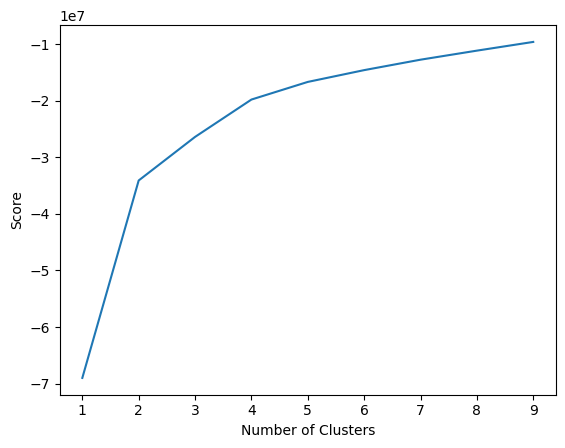

In [42]:
# Creating Elbow Curve plot
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.show()

The elbow curve shows a large jump from one to three, and after 4, it straightens out. Therefore, the optimal amount of clusters is 4

# K-Means Clustering

In [43]:
# Creating K-Means object
kmeans = KMeans(n_clusters = 4)

In [44]:
# Fitting K-Means object to data
kmeans.fit(df_num)

C:\Users\jenni\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [45]:
# Creating Clusters column

df_num['Clusters'] = kmeans.fit_predict(df_num)

C:\Users\jenni\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [46]:
df_num.head()

,n_killed,n_injured,latitude,longitude,congressional_district,Clusters
0,0,4,40.3467,-79.8559,14.0,0
1,1,3,33.9090,-118.3330,43.0,2
2,1,3,41.4455,-82.1377,9.0,0
3,4,0,39.6518,-104.8020,6.0,1
4,2,2,36.1140,-79.9569,6.0,0


In [47]:
df_num['Clusters'].value_counts()

Clusters
0    93451
3    93156
1    26485
2    14631
Name: count, dtype: int64

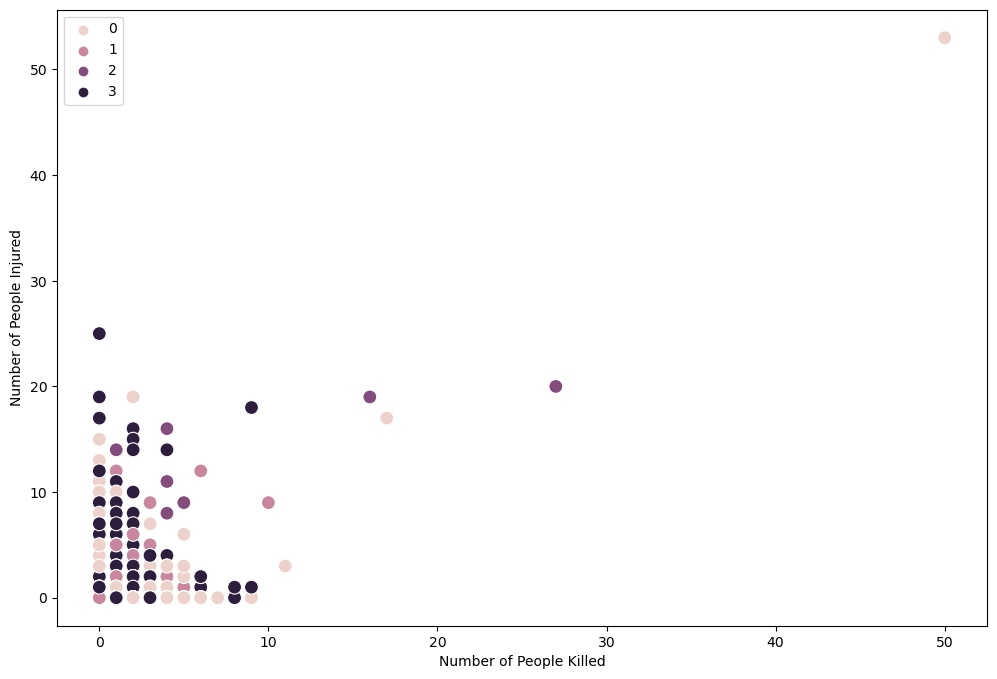

In [48]:
# Plotting n_killed and n_injured clusters
plt.figure(figsize=(12, 8))
ax = sns.scatterplot(x=df_num['n_killed'], y=df_num['n_injured'], hue=kmeans.labels_, s=100)
ax.grid(False)
plt.xlabel('Number of People Killed')
plt.ylabel('Number of People Injured')
plt.show()

There does not seem to be any pattern in the clusters, with most clusters spread evenly among the number of people injured and killed. Only the dark purple seems to be in the higher casualty count

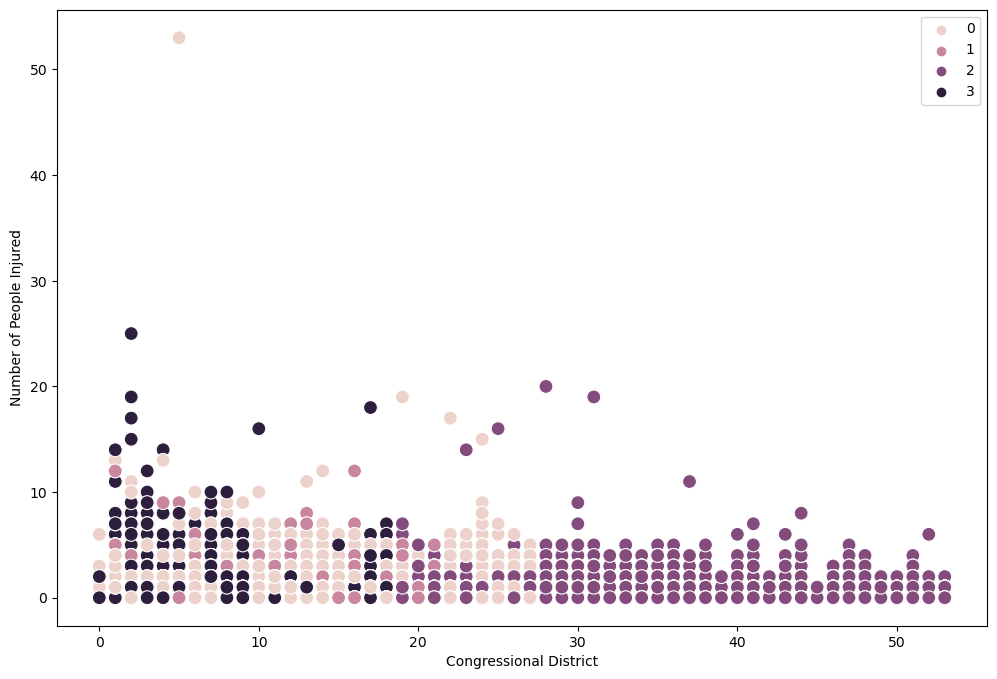

In [49]:
# Plotting n_injured and Congressional District clusters
plt.figure(figsize=(12, 8))
ax = sns.scatterplot(x=df_num['congressional_district'], y=df_num['n_injured'], hue=kmeans.labels_, s=100)
ax.grid(False)
plt.xlabel('Congressional District')
plt.ylabel('Number of People Injured')
plt.show()

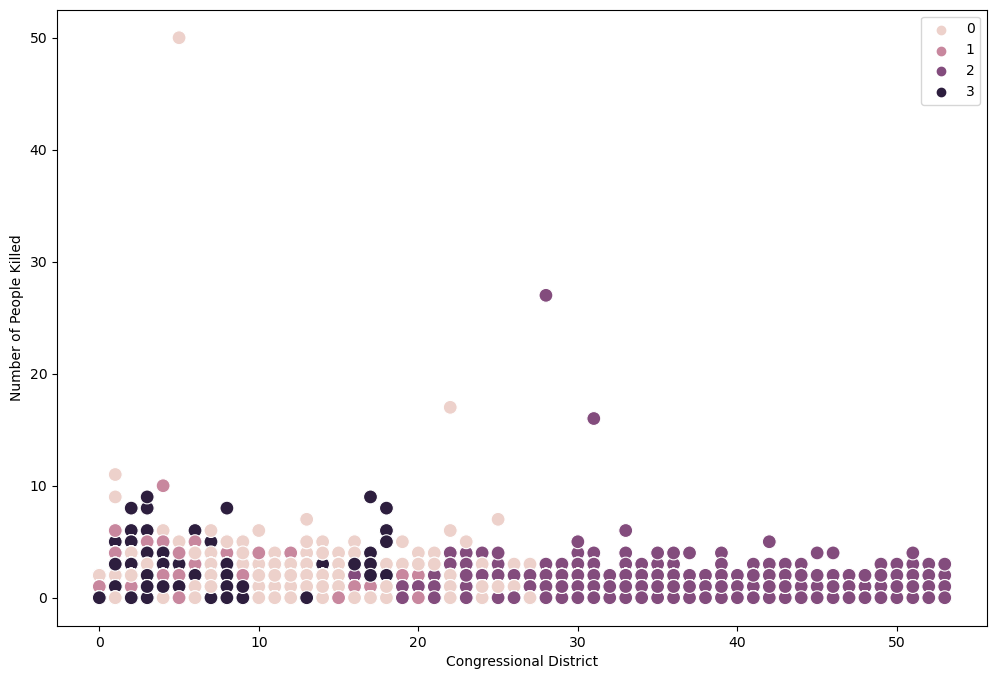

In [50]:
# Plotting n_killed and Congressional District clusters
plt.figure(figsize=(12, 8))
ax = sns.scatterplot(x=df_num['congressional_district'], y=df_num['n_killed'], hue=kmeans.labels_, s=100)
ax.grid(False)
plt.xlabel('Congressional District')
plt.ylabel('Number of People Killed')
plt.show()

Now, the scatterplots with congressional district show a much clearer pattern. The light pink is mostly on the left of the x-axis, the pink one also on the left and a little towards the middle, the purple concentrated the most between the left and the middle, and the dark purple from the middle to the right. This makes sense as district numbers are categorized by nature. 

In [51]:
# Changing Names of values in Clusters column
df_num.loc[df_num['Clusters'] == 3, 'cluster'] = 'Dark purple'
df_num.loc[df_num['Clusters'] == 2, 'cluster'] = 'Purple'
df_num.loc[df_num['Clusters'] == 1, 'cluster'] = 'Pink'
df_num.loc[df_num['Clusters'] == 0, 'cluster'] = 'Light pink'

In [52]:
df_num.groupby('cluster').agg({'n_killed':['mean', 'median'],
                             'n_injured':['mean', 'median'],
                              'congressional_district':['mean', 'median'],}).round(2)

n_killed        n_injured        congressional_district       
                mean median      mean median                   mean median
cluster                                                                   
Dark purple     0.25    0.0      0.55    0.0                   4.70    4.0
Light pink      0.22    0.0      0.48    0.0                   8.23    7.0
Pink            0.27    0.0      0.39    0.0                   5.85    4.0
Purple          0.37    0.0      0.46    0.0                  31.42   30.0

Whereas the scatterplot for number killed and injured shows no clear pattern, the mean of the clusters is the highest for the dark purple colour, followed by the pink one. This may be explained by the outliers, as with most of the data being 0 or 1, a value of 10 or more of course will pull up the mean some
Interestingly, the light pink, the second lowest mean for number killed, has the highest mean for number injured. This further confirms that there is a slight negative correlation between number killed and number injured, meaning if there are more people injured, there are less people killed.

### Future Steps
The above mentioned insight raises an interesting question: what might be the reason it seems that many people injured in a gun violence incident does not lead to more deaths, but even less deaths it seems. What causes/influences this?